In [1]:
import sys
print(sys.executable)

/opt/anaconda3/bin/python


In [6]:
!/usr/local/bin/python3 -m pip install tweepy pandas

  Using cached tweepy-4.15.0-py3-none-any.whl.metadata (4.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.5 MB/s eta 0:00:00
  Using cached oauthlib-3.2.2-py3-none-any.whl.metadata (7.5 kB)
  Using cached requests_oauthlib-2.0.0-py2.py3-none-any.whl.metadata (11 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.8 MB/s eta 0:00:00
Using cached tweepy-4.15.0-py3-none-any.whl (99 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 11.9 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 11.1 MB/s eta 0:00:00m eta 0:00:010:00:01
Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 10.6 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.1 MB/s eta 0:00:00
Using cached requests_oauthlib-2.0.0-py2.py3-none-any.whl (24 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [8]:
import tweepy
print("tweepy imported successfully")

tweepy imported successfully


In [12]:
mv ~/Downloads/bitcoin-tweets.zip /Users/gaoyue/w7/bitcoin_price_prediction_2023106041_YUE-GAO/data/

mv: rename /Users/gaoyue/Downloads/bitcoin-tweets.zip to /Users/gaoyue/w7/bitcoin_price_prediction_2023106041_YUE-GAO/data/bitcoin-tweets.zip: No such file or directory


In [1]:
import csv

input_file = "../data/bitcoin_tweets_kaggle.csv"
output_file = "../data/bitcoin_tweets_kaggle_cleaned.csv"

# 打开文件，逐行读取
with open(input_file, 'r', encoding='latin1') as infile, open(output_file, 'w', encoding='utf-8') as outfile:
    reader = csv.reader(infile, lineterminator='\n')
    writer = csv.writer(outfile, lineterminator='\n')
    
    # 写入表头
    header = next(reader)  # 读取第一行（表头）
    writer.writerow(["date", "text"])  # 只保留 date 和 text 列
    
    # 找到 date 和 text 列的索引
    date_idx = header.index("date")
    text_idx = header.index("text")
    
    # 逐行处理
    count = 0
    for row in reader:
        try:
            # 只提取 date 和 text 列
            writer.writerow([row[date_idx], row[text_idx]])
            count += 1
            if count >= 1000:  # 只取 1000 条
                break
        except (IndexError, UnicodeDecodeError):
            # 跳过无法解析的行
            continue

print(f"Processed {count} rows and saved to {output_file}")

Processed 1000 rows and saved to ../data/bitcoin_tweets_kaggle_cleaned.csv


In [2]:
import pandas as pd

# 加载清理后的文件
kaggle_tweets = pd.read_csv("../data/bitcoin_tweets_kaggle_cleaned.csv")
kaggle_tweets.rename(columns={"date": "timestamp"}, inplace=True)
kaggle_tweets["language"] = "en"  # 添加语言列
tweets = kaggle_tweets.head(1000)  # 确保只取 1000 条

# 保存到 CSV
tweets.to_csv("../data/tweets.csv", index=False)
print(f"Collected {len(tweets)} tweets from Kaggle dataset and saved to data/tweets.csv")

Collected 1000 tweets from Kaggle dataset and saved to data/tweets.csv


In [3]:
pip install praw

  Using cached praw-7.8.1-py3-none-any.whl.metadata (9.4 kB)
  Using cached prawcore-2.4.0-py3-none-any.whl.metadata (5.0 kB)
  Using cached update_checker-0.18.0-py3-none-any.whl.metadata (2.3 kB)
Using cached praw-7.8.1-py3-none-any.whl (189 kB)
Using cached prawcore-2.4.0-py3-none-any.whl (17 kB)
Using cached update_checker-0.18.0-py3-none-any.whl (7.0 kB)

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.6/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
!pip install pandas


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import praw
import pandas as pd
from datetime import datetime

# 初始化 Reddit API 客户端
reddit = praw.Reddit(
    client_id="1iggtu7LVAL8N2ff2zg3DA",
    client_secret="miXByiooBGMjOvWJnoFUyzGjMUYWrA",
    user_agent="BitcoinBot/0.1 by Bright-Complex1396",
    username="Bright-Complex1396",
    password="MyNewRedditPass123"  # 使用新密码
)

# 采集 r/Bitcoin 子版块的帖子
subreddit = reddit.subreddit("Bitcoin")
posts = []

# 采集最新的 100 条帖子
for submission in subreddit.new(limit=100):
    posts.append({
        "timestamp": datetime.fromtimestamp(submission.created_utc).strftime('%Y-%m-%d %H:%M:%S'),
        "text": submission.title + " " + (submission.selftext if submission.selftext else ""),
        "language": "en"
    })

# 转换为 DataFrame
reddit_posts = pd.DataFrame(posts)

# 保存到 CSV
reddit_posts.to_csv("../data/reddit_posts.csv", index=False)
print(f"Collected {len(reddit_posts)} Reddit posts and saved to data/reddit_posts.csv")

Collected 100 Reddit posts and saved to data/reddit_posts.csv


In [3]:
ls /Users/gaoyue/w7/bitcoin_price_prediction_2023106041_YUE-GAO/data/reddit_posts.csv

/Users/gaoyue/w7/bitcoin_price_prediction_2023106041_YUE-GAO/data/reddit_posts.csv


In [6]:
!head -n 5 /Users/gaoyue/w7/bitcoin_price_prediction_2023106041_YUE-GAO/data/reddit_posts.csv

timestamp,text,language
2025-04-21 15:26:27,"Bitcoin to Gold Ratio The simplest way to get rich: sell gold, buy bitcoin.",en
2025-04-21 15:08:46,"Daily Discussion, April 21, 2025 Please utilize this sticky thread for all general **Bitcoin** discussions! If you see posts on the front page or /r/Bitcoin/new which are better suited for this daily discussion thread, please help out by directing the OP to this thread instead. Thank you!

If you don't get an answer to your question, you can try phrasing it differently or commenting again tomorrow.


In [7]:
import requests
import pandas as pd

# NewsAPI 密钥
api_key = "232870d36c4c4d0883a0e466e70a611b"  # 您的 NewsAPI 密钥

# 请求 NewsAPI 数据
url = "https://newsapi.org/v2/everything"
params = {
    "q": "bitcoin",  # 搜索关键词
    "language": "en",  # 语言
    "sortBy": "publishedAt",  # 按发布日期排序
    "apiKey": api_key
}

response = requests.get(url, params=params)
news_data = response.json()

# 提取文章
articles = []
for article in news_data["articles"][:100]:  # 取前 100 条
    articles.append({
        "timestamp": article["publishedAt"],
        "text": article["title"] + " " + (article["description"] if article["description"] else ""),
        "language": "en"
    })

# 转换为 DataFrame
news_articles = pd.DataFrame(articles)

# 保存到 CSV
news_articles.to_csv("../data/news_articles.csv", index=False)
print(f"Collected {len(news_articles)} news articles and saved to data/news_articles.csv")

Collected 100 news articles and saved to data/news_articles.csv


In [8]:
# 方法 1：使用 Python 查看前 5 行
import pandas as pd

news_data = pd.read_csv("../data/news_articles.csv")
news_data.head(5)

,timestamp,text,language
0,2025-04-20T06:35:57Z,"Boeing jet returns to US from China, a victim ...",en
1,2025-04-20T06:25:09Z,"Bitcoin: With 2,106 whale wallets and counting...",en
2,2025-04-20T06:16:50Z,Short Interest in Valkyrie Bitcoin Miners ETF ...,en
3,2025-04-20T06:02:56Z,Hut 8 Corp. (TSE:HUT) Receives Consensus Recom...,en
4,2025-04-20T05:00:34Z,Public-private collaboration is shaping Pakist...,en


In [9]:
!head -n 5 /Users/gaoyue/w7/bitcoin_price_prediction_2023106041_YUE-GAO/data/news_articles.csv

timestamp,text,language
2025-04-20T06:35:57Z,"Boeing jet returns to US from China, a victim of Trump’s tariff war By Reuters ",en
2025-04-20T06:25:09Z,"Bitcoin: With 2,106 whale wallets and counting, BTC’s big buyers are back! What now? BTC sees a shift in market sentiment, with vote up or down turning green for the first time in four months.
- Bitcoin whales are back in the market, with whale addresses hitting a 2025 high of 2106.
Over the past months, Bitcoin [BTC] has experienced extreme …",en


In [10]:
import pandas as pd

# 读取数据
reddit_data = pd.read_csv("../data/reddit_posts.csv")
news_data = pd.read_csv("../data/news_articles.csv")
twitter_data = pd.read_csv("../data/tweets.csv")

# 检查缺失值
print("Twitter Data Missing Values:")
print(twitter_data.isnull().sum())
print("\nReddit Data Missing Values:")
print(reddit_data.isnull().sum())
print("\nNews Data Missing Values:")
print(news_data.isnull().sum())

# 删除缺失值
twitter_data = twitter_data.dropna()
reddit_data = reddit_data.dropna()
news_data = news_data.dropna()

# 保存清理后的数据
twitter_data.to_csv("../data/tweets_cleaned.csv", index=False)
reddit_data.to_csv("../data/reddit_posts_cleaned.csv", index=False)
news_data.to_csv("../data/news_articles_cleaned.csv", index=False)

Twitter Data Missing Values:
timestamp    0
text         0
language     0
dtype: int64

Reddit Data Missing Values:
timestamp    0
text         0
language     0
dtype: int64

News Data Missing Values:
timestamp    0
text         0
language     0
dtype: int64


In [21]:
!pip install textblob


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [23]:
import sys
print(sys.executable)

/opt/anaconda3/bin/python


In [2]:
from textblob import TextBlob

# 测试 TextBlob 是否可用
text = "I love Bitcoin!"
blob = TextBlob(text)
print(blob.sentiment.polarity)

0.625


In [3]:
# 在 Jupyter Notebook 中运行
!pip show textblob

Name: textblob
Version: 0.19.0
Summary: Simple, Pythonic text processing. Sentiment analysis, part-of-speech tagging, noun phrase parsing, and more.
Home-page: 
Author: 
Author-email: Steven Loria <sloria1@gmail.com>
License: 
Location: /opt/anaconda3/envs/aimath/lib/python3.11/site-packages
Requires: nltk
Required-by: 


In [4]:
import pandas as pd
from textblob import TextBlob

# 读取数据
print("加载数据中...")
twitter_data = pd.read_csv("../data/tweets.csv")
reddit_data = pd.read_csv("../data/reddit_posts.csv")
news_data = pd.read_csv("../data/news_articles.csv")

# 显示数据行数
print(f"Twitter 数据: {len(twitter_data)} 条")
print(f"Reddit 数据: {len(reddit_data)} 条")
print(f"News 数据: {len(news_data)} 条")

加载数据中...
Twitter 数据: 1000 条
Reddit 数据: 100 条
News 数据: 100 条


In [5]:
# 对 Twitter 数据进行情感分析
print("正在分析 Twitter 数据情感...")
twitter_data["sentiment"] = twitter_data["text"].apply(lambda x: TextBlob(x).sentiment.polarity)

# 显示前 5 行
print("\nTwitter 数据情感分析结果（前 5 行）：")
display(twitter_data[["text", "sentiment"]].head())

正在分析 Twitter 数据情感...

Twitter 数据情感分析结果（前 5 行）：


,text,sentiment
0,Which #bitcoin books should I think about read...,0.000000
1,"@ThankGodForBTC I appreciate the message, but ...",0.000000
2,#Ethereum price update: \n\n#ETH $1664.02 USD\...,0.000000
3,CoinDashboard v3.0 is here\nAvailable on ios a...,0.400000
4,#Bitcoin Short Term Fractal (4H)ð¥\n\nIn low...,0.033333


In [6]:
# 对 Reddit 数据进行情感分析
print("正在分析 Reddit 数据情感...")
reddit_data["sentiment"] = reddit_data["text"].apply(lambda x: TextBlob(x).sentiment.polarity)

# 显示前 5 行
print("\nReddit 数据情感分析结果（前 5 行）：")
display(reddit_data[["text", "sentiment"]].head())

正在分析 Reddit 数据情感...

Reddit 数据情感分析结果（前 5 行）：


,text,sentiment
0,Bitcoin to Gold Ratio The simplest way to get ...,0.375000
1,"Daily Discussion, April 21, 2025 Please utiliz...",0.042262
2,"$88,000 going one ☝️ going twice BTC adj Khali...",0.000000
3,🟠 Jeff Booth explains that once you really und...,-0.025000
4,Is there anyone who suddenly locked up the Wee...,0.400000


In [7]:
# 对 News 数据进行情感分析
print("正在分析 News 数据情感...")
news_data["sentiment"] = news_data["text"].apply(lambda x: TextBlob(x).sentiment.polarity)

# 显示前 5 行
print("\nNews 数据情感分析结果（前 5 行）：")
display(news_data[["text", "sentiment"]].head())

正在分析 News 数据情感...

News 数据情感分析结果（前 5 行）：


,text,sentiment
0,"Boeing jet returns to US from China, a victim ...",-0.075000
1,"Bitcoin: With 2,106 whale wallets and counting...",0.047944
2,Short Interest in Valkyrie Bitcoin Miners ETF ...,0.102381
3,Hut 8 Corp. (TSE:HUT) Receives Consensus Recom...,0.425000
4,Public-private collaboration is shaping Pakist...,0.000000


In [8]:
# 保存带情感分析结果的数据
print("正在保存情感分析结果...")
twitter_data.to_csv("../data/tweets_with_sentiment.csv", index=False)
reddit_data.to_csv("../data/reddit_posts_with_sentiment.csv", index=False)
news_data.to_csv("../data/news_articles_with_sentiment.csv", index=False)

# 验证文件是否生成
print("\n生成的文件：")
!ls ../data/

正在保存情感分析结果...

生成的文件：
bitcoin_tweets_kaggle.csv         reddit_posts_cleaned.csv
bitcoin_tweets_kaggle_cleaned.csv reddit_posts_with_sentiment.csv
news_articles.csv                 tweets.csv
news_articles_cleaned.csv         tweets_cleaned.csv
news_articles_with_sentiment.csv  tweets_with_sentiment.csv
reddit_posts.csv


In [9]:
reddit_sentiment_data = pd.read_csv("../data/reddit_posts_with_sentiment.csv")
display(reddit_sentiment_data.head(5))

,timestamp,text,language,sentiment
0,2025-04-21 15:26:27,Bitcoin to Gold Ratio The simplest way to get ...,en,0.375000
1,2025-04-21 15:08:46,"Daily Discussion, April 21, 2025 Please utiliz...",en,0.042262
2,2025-04-21 14:53:01,"$88,000 going one ☝️ going twice BTC adj Khali...",en,0.000000
3,2025-04-21 14:41:47,🟠 Jeff Booth explains that once you really und...,en,-0.025000
4,2025-04-21 13:59:01,Is there anyone who suddenly locked up the Wee...,en,0.400000


In [10]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 3.0 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for peewee: filename=peewee-3.17.9-cp311-cp311-macosx_11_0_arm64.whl size=264471 sha256=dea18595b47b7ce060cef0a2c5f58ec17f7709749e580233d60a340d054f39fe
  Stored in directory: /Users/gaoyue/Library/Caches/pip/wheels/f4/14/e4/50c88c865833085aeb91e2bd40e3a683ff434806386b8ee7bc
Successfully built peewee

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [11]:
import yfinance as yf

# 获取 Bitcoin 价格数据
print("正在获取 Bitcoin 价格数据...")
btc_data = yf.download("BTC-USD", start="2023-01-01", end="2025-04-21")
btc_data.reset_index(inplace=True)
btc_data["timestamp"] = btc_data["Date"].dt.strftime('%Y-%m-%d %H:%M:%S')
btc_data.to_csv("../data/btc_prices.csv", index=False)
print("Bitcoin 价格数据已保存到 btc_prices.csv")
display(btc_data.head())

正在获取 Bitcoin 价格数据...
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Bitcoin 价格数据已保存到 btc_prices.csv


Price,Date,Close,High,Low,Open,Volume,timestamp
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,
0,2023-01-01,16625.080078,16630.439453,16521.234375,16547.914062,9244361700,2023-01-01 00:00:00
1,2023-01-02,16688.470703,16759.343750,16572.228516,16625.509766,12097775227,2023-01-02 00:00:00
2,2023-01-03,16679.857422,16760.447266,16622.371094,16688.847656,13903079207,2023-01-03 00:00:00
3,2023-01-04,16863.238281,16964.585938,16667.763672,16680.205078,18421743322,2023-01-04 00:00:00
4,2023-01-05,16836.736328,16884.021484,16790.283203,16863.472656,13692758566,2023-01-05 00:00:00


In [12]:
# 读取价格数据
btc_data = pd.read_csv("../data/btc_prices.csv")

# 转换为 datetime 格式
btc_data["timestamp"] = pd.to_datetime(btc_data["timestamp"])
reddit_data["timestamp"] = pd.to_datetime(reddit_data["timestamp"])

# 按时间戳合并（以 Reddit 数据为例）
combined_data = btc_data.merge(reddit_data[["timestamp", "sentiment"]], on="timestamp", how="left")
combined_data["sentiment"] = combined_data["sentiment"].fillna(0)  # 填充缺失值
print("合并后的数据：")
display(combined_data.head())

合并后的数据：


,Date,Close,High,Low,Open,Volume,timestamp,sentiment
0,NaN,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,NaT,0.0
1,2023-01-01,16625.080078125,16630.439453125,16521.234375,16547.9140625,9244361700,2023-01-01,0.0
2,2023-01-02,16688.470703125,16759.34375,16572.228515625,16625.509765625,12097775227,2023-01-02,0.0
3,2023-01-03,16679.857421875,16760.447265625,16622.37109375,16688.84765625,13903079207,2023-01-03,0.0
4,2023-01-04,16863.23828125,16964.5859375,16667.763671875,16680.205078125,18421743322,2023-01-04,0.0


In [13]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 2.9 MB/s eta 0:00:002.9 MB/s eta 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# 准备数据
X = combined_data[["sentiment"]]  # 特征：情感得分
y = combined_data["Close"]  # 目标：收盘价

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
model = LinearRegression()
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 计算均方根误差
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"模型的 RMSE: {rmse}")

# 显示部分预测结果
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
display(results.head())

In [15]:
!pip install yfinance


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [39]:
import yfinance as yf

# 获取 Bitcoin 价格数据
print("正在获取 Bitcoin 价格数据...")
btc_data = yf.download("BTC-USD", start="2023-01-01", end="2025-04-21")
btc_data.reset_index(inplace=True)
btc_data["timestamp"] = btc_data["Date"].dt.strftime('%Y-%m-%d %H:%M:%S')
btc_data.to_csv("../data/btc_prices.csv", index=False)
print("Bitcoin 价格数据已保存到 btc_prices.csv")
display(btc_data.head())

[*********************100%***********************]  1 of 1 completed

正在获取 Bitcoin 价格数据...
Bitcoin 价格数据已保存到 btc_prices.csv


Price,Date,Close,High,Low,Open,Volume,timestamp
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,
0,2023-01-01,16625.080078,16630.439453,16521.234375,16547.914062,9244361700,2023-01-01 00:00:00
1,2023-01-02,16688.470703,16759.343750,16572.228516,16625.509766,12097775227,2023-01-02 00:00:00
2,2023-01-03,16679.857422,16760.447266,16622.371094,16688.847656,13903079207,2023-01-03 00:00:00
3,2023-01-04,16863.238281,16964.585938,16667.763672,16680.205078,18421743322,2023-01-04 00:00:00
4,2023-01-05,16836.736328,16884.021484,16790.283203,16863.472656,13692758566,2023-01-05 00:00:00


In [40]:
import pandas as pd

# 读取数据
twitter_data = pd.read_csv("../data/tweets_with_sentiment.csv")
reddit_data = pd.read_csv("../data/reddit_posts_with_sentiment.csv")
news_data = pd.read_csv("../data/news_articles_with_sentiment.csv")
btc_data = pd.read_csv("../data/btc_prices.csv")

# 转换为 datetime 格式
twitter_data["timestamp"] = pd.to_datetime(twitter_data["timestamp"])
reddit_data["timestamp"] = pd.to_datetime(reddit_data["timestamp"])
news_data["timestamp"] = pd.to_datetime(news_data["timestamp"])
btc_data["timestamp"] = pd.to_datetime(btc_data["timestamp"])

# 按天聚合 Twitter 数据的平均情感得分
twitter_data["date"] = twitter_data["timestamp"].dt.date
twitter_daily_sentiment = twitter_data.groupby("date")["sentiment"].mean().reset_index()
twitter_daily_sentiment["date"] = pd.to_datetime(twitter_daily_sentiment["date"])

# 按天聚合 Reddit 数据的平均情感得分
reddit_data["date"] = reddit_data["timestamp"].dt.date
reddit_daily_sentiment = reddit_data.groupby("date")["sentiment"].mean().reset_index()
reddit_daily_sentiment["date"] = pd.to_datetime(reddit_daily_sentiment["date"])

# 按天聚合 NewsAPI 数据的平均情感得分
news_data["date"] = news_data["timestamp"].dt.date
news_daily_sentiment = news_data.groupby("date")["sentiment"].mean().reset_index()
news_daily_sentiment["date"] = pd.to_datetime(news_daily_sentiment["date"])

# 合并 Twitter 情感数据与价格数据
btc_data["date"] = btc_data["timestamp"].dt.date
btc_data["date"] = pd.to_datetime(btc_data["date"])
combined_twitter = btc_data.merge(twitter_daily_sentiment, how="left", left_on="date", right_on="date")
combined_twitter["sentiment"] = combined_twitter["sentiment"].fillna(0)
combined_twitter = combined_twitter.rename(columns={"sentiment": "twitter_sentiment"})

# 合并 Reddit 情感数据与价格数据
combined_reddit = btc_data.merge(reddit_daily_sentiment, how="left", left_on="date", right_on="date")
combined_reddit["sentiment"] = combined_reddit["sentiment"].fillna(0)
combined_reddit = combined_reddit.rename(columns={"sentiment": "reddit_sentiment"})

# 合并 NewsAPI 情感数据与价格数据
combined_news = btc_data.merge(news_daily_sentiment, how="left", left_on="date", right_on="date")
combined_news["sentiment"] = combined_news["sentiment"].fillna(0)
combined_news = combined_news.rename(columns={"sentiment": "news_sentiment"})

# 合并所有数据
combined_data = combined_twitter[["timestamp", "Close", "twitter_sentiment"]].merge(
    combined_reddit[["timestamp", "reddit_sentiment"]], on="timestamp", how="left"
).merge(
    combined_news[["timestamp", "news_sentiment"]], on="timestamp", how="left"
)

# 填充缺失值
combined_data["twitter_sentiment"] = combined_data["twitter_sentiment"].fillna(0)
combined_data["reddit_sentiment"] = combined_data["reddit_sentiment"].fillna(0)
combined_data["news_sentiment"] = combined_data["news_sentiment"].fillna(0)

# 保存合并数据
combined_data.to_csv("../data/combined_data.csv", index=False)
print("合并数据已保存到 combined_data.csv")
display(combined_data.head())

合并数据已保存到 combined_data.csv


,timestamp,Close,twitter_sentiment,reddit_sentiment,news_sentiment
0,NaT,BTC-USD,0.0,0.0,0.0
1,2023-01-01,16625.080078125,0.0,0.0,0.0
2,2023-01-02,16688.470703125,0.0,0.0,0.0
3,2023-01-03,16679.857421875,0.0,0.0,0.0
4,2023-01-04,16863.23828125,0.0,0.0,0.0


In [41]:
import pandas as pd

# 读取数据
combined_data = pd.read_csv("../data/combined_data.csv")

# 显示原始数据
print("原始数据列名：")
print(combined_data.columns)
print("\n原始数据前 5 行：")
display(combined_data.head())

# 移除 Close 列中的非数值行
combined_data = combined_data[pd.to_numeric(combined_data["Close"], errors='coerce').notna()]

# 确保 Close 列是数值类型
combined_data["Close"] = combined_data["Close"].astype(float)

# 显示修复后的数据
print("\n修复后数据前 5 行：")
display(combined_data.head())

# 检查数据类型
print("\n数据类型：")
print(combined_data.dtypes)

# 保存修复后的数据（确保覆盖旧文件）
combined_data.to_csv("../data/combined_data.csv", index=False)
print("已修复并保存 combined_data.csv")

原始数据列名：
Index(['timestamp', 'Close', 'twitter_sentiment', 'reddit_sentiment',
       'news_sentiment'],
      dtype='object')

原始数据前 5 行：


,timestamp,Close,twitter_sentiment,reddit_sentiment,news_sentiment
0,NaN,BTC-USD,0.0,0.0,0.0
1,2023-01-01,16625.080078125,0.0,0.0,0.0
2,2023-01-02,16688.470703125,0.0,0.0,0.0
3,2023-01-03,16679.857421875,0.0,0.0,0.0
4,2023-01-04,16863.23828125,0.0,0.0,0.0



修复后数据前 5 行：


,timestamp,Close,twitter_sentiment,reddit_sentiment,news_sentiment
1,2023-01-01,16625.080078,0.0,0.0,0.0
2,2023-01-02,16688.470703,0.0,0.0,0.0
3,2023-01-03,16679.857422,0.0,0.0,0.0
4,2023-01-04,16863.238281,0.0,0.0,0.0
5,2023-01-05,16836.736328,0.0,0.0,0.0



数据类型：
timestamp             object
Close                float64
twitter_sentiment    float64
reddit_sentiment     float64
news_sentiment       float64
dtype: object
已修复并保存 combined_data.csv


In [42]:
import pandas as pd

# 读取数据
combined_data = pd.read_csv("../data/combined_data.csv")

# 显示原始数据
print("原始数据列名：")
print(combined_data.columns)
print("\n原始数据前 5 行：")
display(combined_data.head())

# 移除 Close 列中的非数值行
combined_data = combined_data[pd.to_numeric(combined_data["Close"], errors='coerce').notna()]

# 确保 Close 列是数值类型
combined_data["Close"] = combined_data["Close"].astype(float)

# 显示修复后的数据
print("\n修复后数据前 5 行：")
display(combined_data.head())

# 检查数据类型
print("\n数据类型：")
print(combined_data.dtypes)

# 保存修复后的数据（确保覆盖旧文件）
combined_data.to_csv("../data/combined_data.csv", index=False)
print("已修复并保存 combined_data.csv")

原始数据列名：
Index(['timestamp', 'Close', 'twitter_sentiment', 'reddit_sentiment',
       'news_sentiment'],
      dtype='object')

原始数据前 5 行：


,timestamp,Close,twitter_sentiment,reddit_sentiment,news_sentiment
0,2023-01-01,16625.080078,0.0,0.0,0.0
1,2023-01-02,16688.470703,0.0,0.0,0.0
2,2023-01-03,16679.857422,0.0,0.0,0.0
3,2023-01-04,16863.238281,0.0,0.0,0.0
4,2023-01-05,16836.736328,0.0,0.0,0.0



修复后数据前 5 行：


,timestamp,Close,twitter_sentiment,reddit_sentiment,news_sentiment
0,2023-01-01,16625.080078,0.0,0.0,0.0
1,2023-01-02,16688.470703,0.0,0.0,0.0
2,2023-01-03,16679.857422,0.0,0.0,0.0
3,2023-01-04,16863.238281,0.0,0.0,0.0
4,2023-01-05,16836.736328,0.0,0.0,0.0



数据类型：
timestamp             object
Close                float64
twitter_sentiment    float64
reddit_sentiment     float64
news_sentiment       float64
dtype: object
已修复并保存 combined_data.csv


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# 读取合并数据
combined_data = pd.read_csv("../data/combined_data.csv")

# 准备特征和目标
X = combined_data[["twitter_sentiment", "reddit_sentiment", "news_sentiment"]]
y = combined_data["Close"]

# 检查数据类型
print("特征数据类型：")
print(X.dtypes)
print("\n目标数据类型：")
print(y.dtype)

# 确保数据是数值类型
X = X.astype(float)
y = y.astype(float)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
model = LinearRegression()
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 计算均方根误差
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"模型的 RMSE: {rmse}")

# 显示部分预测结果
results = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred})
display(results.head())

特征数据类型：
twitter_sentiment    float64
reddit_sentiment     float64
news_sentiment       float64
dtype: object

目标数据类型：
float64
模型的 RMSE: 24612.719950850907


,Actual,Predicted
0,60636.855469,53268.672601
1,84353.148438,53268.672601
2,23139.283203,53268.672601
3,56662.375000,53268.672601
4,27925.859375,53268.672601


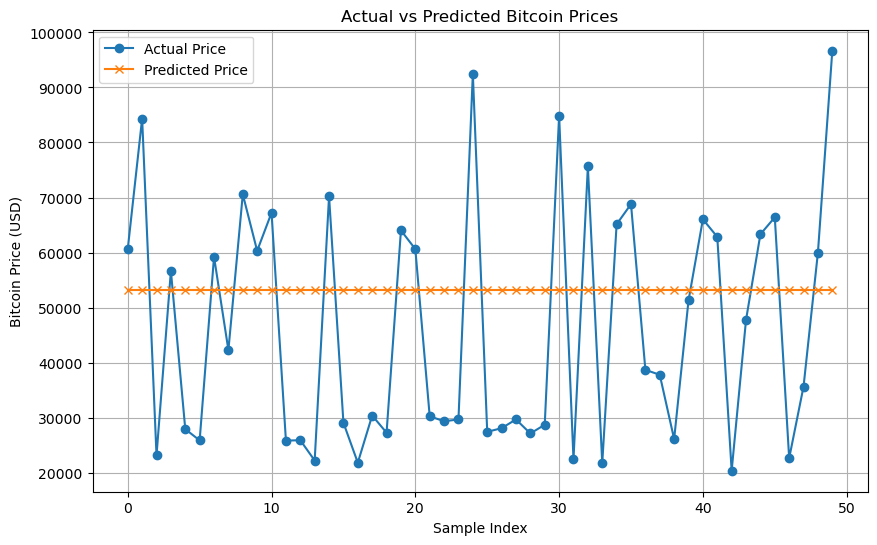

In [45]:
import matplotlib.pyplot as plt

# 绘制预测值与实际值
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:50], label="Actual Price", marker="o")
plt.plot(y_pred[:50], label="Predicted Price", marker="x")
plt.xlabel("Sample Index")
plt.ylabel("Bitcoin Price (USD)")
plt.title("Actual vs Predicted Bitcoin Prices")
plt.legend()
plt.grid(True)
plt.show()